In [531]:
import pandas as pd
import requests
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [285]:
#importing the file into a dataFrame
arch_df =pd.read_csv('twitter-archive-enhanced.csv')

In [82]:
#download the file programmaticly and import it into a dataFrame
image_predictions_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(image_predictions_url)
with open('image_predictions.tsv','wb')as file:
    file.write(response.content)
   

In [133]:
img_predectins_df=pd.read_csv('image_predictions.tsv',sep='\t')


In [ ]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [64]:
#get data from json file to dataframe
file_df=[]
with open('tweet-json.txt','r')as tweet_json:
    for line in tweet_json:
        file_df.append(json.loads(line)) 

In [65]:
file_df[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [67]:
#creating the DF
tweet_info=pd.DataFrame(file_df,columns=['id','retweet_count','favorite_count'])

In [73]:
tweet_info.sample(5)

,id,retweet_count,favorite_count
306,835685285446955009,9327,0
1823,676470639084101634,5224,12616
599,798673117451325440,6485,0
1013,747103485104099331,4548,10534
526,808733504066486276,2509,8784


In [121]:
img_predectins_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
912,700847567345688576,https://pbs.twimg.com/media/CbnpI_1XIAAiRAz.jpg,1,Rhodesian_ridgeback,0.252514,True,redbone,0.153005,True,whippet,0.135199,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.098752,False,fountain,0.031755,False
671,683111407806746624,https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg,1,cocker_spaniel,0.901392,True,soft-coated_wheaten_terrier,0.028605,True,miniature_schnauzer,0.017805,True
1302,752917284578922496,https://pbs.twimg.com/media/CnLmRiYXEAAO_8f.jpg,1,German_shepherd,0.609283,True,malinois,0.352460,True,kelpie,0.016105,True
299,671486386088865792,https://pbs.twimg.com/media/CVGZTboUsAATohd.jpg,1,German_shepherd,0.827035,True,kelpie,0.087648,True,red_wolf,0.031218,False
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True
1095,720043174954147842,https://pbs.twimg.com/media/Cf4bcm8XEAAX4xV.jpg,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
1126,727524757080539137,https://pbs.twimg.com/media/Chiv6BAW4AAiQvH.jpg,2,Pomeranian,0.958834,True,Chihuahua,0.024099,True,chow,0.003941,True
379,673270968295534593,https://pbs.twimg.com/media/CVfwXuWWIAAqnoi.jpg,1,Shih-Tzu,0.610453,True,Maltese_dog,0.166815,True,Old_English_sheepdog,0.132015,True
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True


In [125]:
arch_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
1216,714982300363173890,NaN,NaN,2016-03-30 01:07:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Calbert. He forgot to clear his Google...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714982300...,9,10,Calbert,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
1872,675146535592706048,NaN,NaN,2015-12-11 02:54:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. He's yelling at the carpet. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675146535...,7,10,Coops,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup's name is Sabertooth (parents must be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210...,9,10,None,None,None,None,None
156,861383897657036800,NaN,NaN,2017-05-08 00:54:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He's never seen bubbles before...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/861383897...,13,10,Hobbes,None,None,None,None
2021,672082170312290304,NaN,NaN,2015-12-02 15:57:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Patch. He wants to be a Christmas tree...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672082170...,11,10,Patch,None,None,None,None
1422,698178924120031232,NaN,NaN,2016-02-12 16:16:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698178924...,10,10,Lily,None,None,None,None
1397,699779630832685056,NaN,NaN,2016-02-17 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take all my money. 10/10 https://t.co/B28ebc5LzQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699779630...,10,10,None,None,None,None,None


In [146]:
tweet_info.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [147]:
img_predectins_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [149]:
arch_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [108]:
#check duplicated records
print(img_predectins_df.duplicated().sum())
print(arch_df.duplicated().sum())
print(tweet_info.duplicated().sum())

0
0
0


In [86]:
img_predectins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [291]:
#check the deffirence between the two tweets
img_predectins_df.query('jpg_url=="https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg"')
#only ID

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False


In [134]:
img_predectins_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg    2
https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg    2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg    2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg    2
https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg    2
                                                  ..
https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg    1
https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg    1
https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg    1
https://pbs.twimg.com/media/CVRcxJ-WsAAXOhO.jpg    1
https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [140]:
#compare the message of first tweet and the second 
arch_df.query('tweet_id==795076730285391872')['text']

626    This is Bailey. She loves going down slides bu...
Name: text, dtype: object

In [292]:
arch_df.query('tweet_id==	823269594223824897')['text']
# its a retweet 

411    RT @dog_rates: We only rate dogs. Please don't...
Name: text, dtype: object

In [142]:
#rating_numerator may be less than 10 and its wrong
arch_df.query('rating_numerator <10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [124]:
arch_df['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Heinrich      1
Carter        1
Blakely       1
Sprout        1
Eevee         1
Name: name, Length: 957, dtype: int64

In [75]:
arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [76]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [ ]:
### Quality
# for arch_df
#1--in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp have to many missing values
#2--tweet_id or any id in any DF must be string ,, img_num in img_prediction_df must be string
#3-- timestamp have ('0000') must be removed
#4-- rating_numerator must be greater than 10
#5-- rating_denominator must be equal 10
#6-- timestamp must be datetime type
#7-- there are alot of none in name and  stage column arch_df and some with lower and uppercase
#8-- remove retweets

### Tidiness
#1-- doggo	floofer	pupper	puppo must be in one column 
#2-- tweet data fram is related to arch_df must be merged

In [151]:
#copying dataframes to keep the orginal
clean_arch_df=arch_df.copy()
clean_tweet_info=tweet_info.copy()
clean_img_predectins_df=img_predectins_df.copy()

In [ ]:
#DEFINING
#1-- i will drop this columns with too many missing values with -> df.drop('a', inplace=True, axis=1) (done)
#2-- id,img_num will be converted to string -> .toString
#3-- slice timestamp to extract (" +0000")
#4-- convert timestamp to datetime
#5-- all recored in rating_numerator will be > 10 and will be 13 for big numbers 
#6-- rating_denominator must be equal 10
#7-- make all names with lowercase
#8-- remove retweets from arch_df by removing records with retweeted_status_id that's not null then drop this columns 


In [ ]:
#Quality issues control

In [294]:
#define 1--

In [295]:
#code 1--
clean_arch_df.drop("in_reply_to_user_id",axis=1,inplace=True)
clean_arch_df.drop("retweeted_status_user_id",axis=1,inplace=True)
clean_arch_df.drop("retweeted_status_timestamp",axis=1,inplace=True)





In [296]:
#test 1--
clean_arch_df.head(1)

,tweet_id,in_reply_to_status_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [297]:
#define 2--


In [298]:
#code 2--
clean_arch_df['timestamp']=clean_arch_df['timestamp'].str[:19]        

In [299]:
#test 2--
clean_arch_df['timestamp']

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

In [300]:
#define 3--

In [301]:
#code 3--
clean_arch_df['tweet_id']=clean_arch_df['tweet_id'].astype(str)
img_predectins_df['tweet_id']=img_predectins_df['tweet_id'].astype(str)
clean_tweet_info['id']=clean_tweet_info['id'].astype(str)
clean_arch_df['timestamp'] = pd.to_datetime(clean_arch_df['timestamp'], format="%Y-%m-%d %H:%M:%S")

In [302]:
#test 3--
print(clean_arch_df['tweet_id'].dtype)
print(img_predectins_df['tweet_id'].dtype)
print(clean_tweet_info['id'].dtype)
print(clean_arch_df['timestamp'].dtype)

object
object
object
datetime64[ns]


In [303]:
#define 4--

In [304]:
#code 4--
clean_arch_df.loc[clean_arch_df['rating_numerator'] <10, 'rating_numerator'] = 10

In [305]:
#test 4--
clean_arch_df['rating_numerator'].value_counts()

10      901
12      558
11      464
13      351
14       54
420       2
15        2
75        2
26        1
88        1
24        1
20        1
44        1
50        1
60        1
80        1
84        1
165       1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [306]:
#define 5--

In [307]:
#code 5--

clean_arch_df.loc[clean_arch_df['rating_numerator'] >14, 'rating_numerator'] = 14


In [308]:
#test 5--
arch_df['rating_numerator'].value_counts()

10    901
12    558
11    464
13    351
14     82
Name: rating_numerator, dtype: int64

In [309]:
#define 6--

In [310]:
#code 6--
clean_arch_df['rating_denominator']=10

In [311]:
#test 6--
clean_arch_df['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [312]:
#define 7--

In [313]:
#code 7--
clean_arch_df['name']=clean_arch_df['name'].str.lower()

In [314]:
#test 7--
clean_arch_df['name']

0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2351        none
2352           a
2353           a
2354           a
2355        none
Name: name, Length: 2356, dtype: object

In [ ]:
#define 8--

In [322]:
#code 8--
#clean_arch_df=clean_arch_df[clean_arch_df['in_reply_to_status_id'].isnull()]

clean_arch_df = clean_arch_df[clean_arch_df.retweeted_status_id.isnull()]

In [335]:
#test 8--
clean_arch_df.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [336]:
#drop in_reply_to_status_id and retweeted_status_id from table 
clean_arch_df.drop("in_reply_to_status_id",axis=1,inplace=True)
clean_arch_df.drop("retweeted_status_id",axis=1,inplace=True)

D:\Anaconda_M\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [344]:
clean_arch_df.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,10,10,an,None,None,None,None
377,828011680017821696,2017-02-04 22:45:42,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brutus and Jersey. They think the...,https://twitter.com/dog_rates/status/828011680...,11,10,brutus,None,None,None,None
348,831670449226514432,2017-02-15 01:04:21,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,https://twitter.com/dog_rates/status/831670449...,13,10,daisy,None,None,None,None
828,768970937022709760,2016-08-26 00:38:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12,10,kirby,None,None,None,None
176,857746408056729600,2017-04-28 00:00:54,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,https://twitter.com/dog_rates/status/857746408...,13,10,thor,None,None,None,None
1331,705591895322394625,2016-03-04 03:13:11,"<a href=""http://twitter.com/download/iphone"" r...","""Ma'am, for the last time, I'm not authorized ...",https://twitter.com/dog_rates/status/705591895...,11,10,none,None,None,None,None
1878,675047298674663426,2015-12-10 20:19:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a fluffy albino Bacardi Columbia mix. ...,https://twitter.com/dog_rates/status/675047298...,11,10,a,None,None,None,None
2121,670408998013820928,2015-11-28 01:08:55,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,https://twitter.com/dog_rates/status/670408998...,10,10,peanut,None,None,None,None
2028,671866342182637568,2015-12-02 01:39:53,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,https://twitter.com/dog_rates/status/671866342...,10,10,dylan,None,None,None,None
391,826204788643753985,2017-01-30 23:05:46,"<a href=""http://twitter.com/download/iphone"" r...","Here's a little more info on Dew, your favorit...",http://us.blastingnews.com/news/2017/01/kentuc...,13,10,none,doggo,None,None,None


In [ ]:
#Tidyness issues

In [414]:
clean_arch_df['stage']='a'

<ipython-input-414-14f9a95179ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_arch_df['stage']='a'


In [444]:
clean_arch_df.tail(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
2355,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,10,10,none,None,None,None,None,NaN


In [445]:
#marge doggo	floofer	pupper	puppo into one column named stage
clean_arch_df.loc[clean_arch_df['doggo']=='doggo','stage']='doggo'
clean_arch_df.loc[clean_arch_df['floofer']=='floofer','stage']='floofer'
clean_arch_df.loc[clean_arch_df['pupper']=='pupper','stage']='pupper'
clean_arch_df.loc[clean_arch_df['puppo']=='puppo','stage']='puppo'

D:\Anaconda_M\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [457]:
clean_arch_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1229,713761197720473600,2016-03-26 16:15:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Piper. She would really like that tenn...,https://twitter.com/dog_rates/status/713761197...,12,10,piper,None,None,None,None,NaN
1839,675891555769696257,2015-12-13 04:14:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Donny. He's summoning the demon monste...,https://twitter.com/dog_rates/status/675891555...,10,10,donny,None,None,None,None,NaN
419,822244816520155136,2017-01-20 00:50:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,https://twitter.com/dog_rates/status/822244816...,11,10,none,None,None,None,None,NaN
757,778624900596654080,2016-09-21 16:00:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a sailor pup. 11/10 would...,https://twitter.com/dog_rates/status/778624900...,11,10,penny,None,None,None,None,NaN
2186,668981893510119424,2015-11-24 02:38:07,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,https://twitter.com/dog_rates/status/668981893...,10,10,none,None,None,None,None,NaN


In [455]:
clean_arch_df.stage.isnull().sum()

1761

In [456]:
clean_arch_df.stage.value_counts()

pupper     230
doggo       72
puppo       24
floofer     10
Name: stage, dtype: int64

In [458]:
clean_arch_df.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

D:\Anaconda_M\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [462]:
clean_arch_df.shape

(2097, 9)

In [479]:
clean_tweet_info.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [466]:
clean_arch_df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,NaN


In [467]:
clean_tweet_info.id.nunique()

2354

In [472]:
clean_tweet_info.id.duplicated().sum()

0

In [468]:
clean_arch_df.tweet_id.nunique()

2097

In [474]:
clean_arch_df.tweet_id.duplicated().sum()

0

In [481]:
clean_tweet_info.shape

(2354, 3)

In [482]:
clean_arch_df.shape

(2097, 9)

In [478]:
clean_tweet_info.rename(columns={'id':'tweet_id'},inplace=True)

In [480]:
tweet_data = pd.merge(clean_tweet_info,clean_arch_df)
tweet_data.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,8853,39467,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,NaN
1,892177421306343426,6514,33819,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,NaN
2,891815181378084864,4328,25461,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,NaN
3,891689557279858688,8964,42908,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,NaN
4,891327558926688256,9774,41048,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,NaN


In [573]:
tweet_data.to_csv('twitter_archive_master.csv',encoding='utf_8')


In [ ]:
# Analysis and visualizations

In [483]:
tweet_data.shape

(2097, 11)

In [487]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   object        
 1   retweet_count       2097 non-null   int64         
 2   favorite_count      2097 non-null   int64         
 3   timestamp           2097 non-null   datetime64[ns]
 4   source              2097 non-null   object        
 5   text                2097 non-null   object        
 6   expanded_urls       2094 non-null   object        
 7   rating_numerator    2097 non-null   int64         
 8   rating_denominator  2097 non-null   int64         
 9   name                2097 non-null   object        
 10  stage               336 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(4), object(5)
memory usage: 182.4+ KB


In [486]:
# change stage data type
tweet_data.stage=tweet_data.stage.astype('category')

In [501]:
#witch source is most commont between tweeter users ? 
tweet_data.source.value_counts()
# its iphone

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [500]:
#clear source column from unnessessary words
tweet_data.source=tweet_data.source.apply(lambda x: x.split('>',)[1])
tweet_data.source=tweet_data.source.apply(lambda x: x.split('<',)[0])
tweet_data.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2092    Twitter for iPhone
2093    Twitter for iPhone
2094    Twitter for iPhone
2095    Twitter for iPhone
2096    Twitter for iPhone
Name: source, Length: 2097, dtype: object

In [511]:
#year of the highest reach 
pd.DatetimeIndex(tweet_data['timestamp']).year.value_counts()
#2016

2016    1054
2015     668
2017     375
Name: timestamp, dtype: int64

In [550]:
#most loved category
doggo_favcount=tweet_data.loc[tweet_data['stage'] == 'doggo', 'favorite_count'].sum()
floofer_favcount=tweet_data.loc[tweet_data['stage'] == 'floofer', 'favorite_count'].sum()
puppo_favcount=tweet_data.loc[tweet_data['stage'] == 'puppo', 'favorite_count'].sum()
pupper_favcount=tweet_data.loc[tweet_data['stage'] == 'pupper', 'favorite_count'].sum()
# pupper

In [574]:
pupper_favcount

1715911

In [549]:
doggo_recount=tweet_data.loc[tweet_data['stage'] == 'doggo', 'retweet_count'].sum()
floofer_recount=tweet_data.loc[tweet_data['stage'] == 'floofer', 'retweet_count'].sum()
puppo_recount=tweet_data.loc[tweet_data['stage'] == 'puppo', 'retweet_count'].sum()
pupper_recount=tweet_data.loc[tweet_data['stage'] == 'pupper', 'retweet_count'].sum()


In [575]:
print(pupper_recount)

587566


Text(0, 0.5, 'reach')

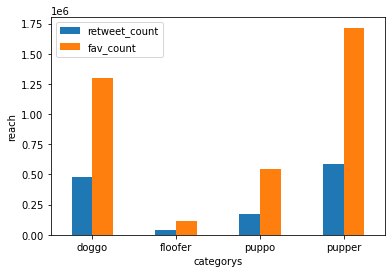

In [554]:
category = ['doggo','floofer','puppo','pupper']
retweet_count = [doggo_recount,floofer_recount,puppo_recount,pupper_recount]
fav_count=[doggo_favcount,floofer_favcount,puppo_favcount,pupper_favcount]

df = pd.DataFrame({'retweet_count':retweet_count,'fav_count':fav_count},index=category)

reach=df.plot.bar(rot=0)
reach.set_xlabel('categorys')
reach.set_ylabel('reach')

<AxesSubplot:xlabel='ratings', ylabel='num of dogs'>

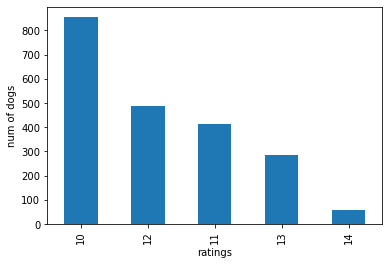

In [562]:
tweet_data.rating_numerator.value_counts().plot(kind='bar',xlabel='ratings',ylabel='num of dogs')


In [557]:
tweet_data.rating_numerator.value_counts()

10    855
12    486
11    413
13    287
14     56
Name: rating_numerator, dtype: int64